# Clustering Assignment Tobigs15th 이성범

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록

# 데이터 확인

- CustomerID: 고객 고유 번호

- Gender: 고객의 성별

- Age: 고객의 나이

- Annual Income (k$): 고객의 연간 소득

- Spending Score (1-100): 고객의 행동 및 소비 성격에 따라서 쇼핑몰에서 부여한 점수

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


현재 데이터의 경우 결측치는 존재하지 않으며 

차원에 나타낼 수 있는 컬럼은 Age, Annual Income (k$), Spending Score (1-100) 로 보인다.

따라서 Age, Annual Income (k$), Spending Score (1-100)를 각각의 경우의 수를 통하여 2차원 상에 시각화를 하고

Age, Annual Income (k$), Spending Score (1-100) 전체를 PCA를 통하여 2차원으로 축소하여 시각화를 진행할 예정이다.


# EDA

### 2가지 차원을 고려한 시각화

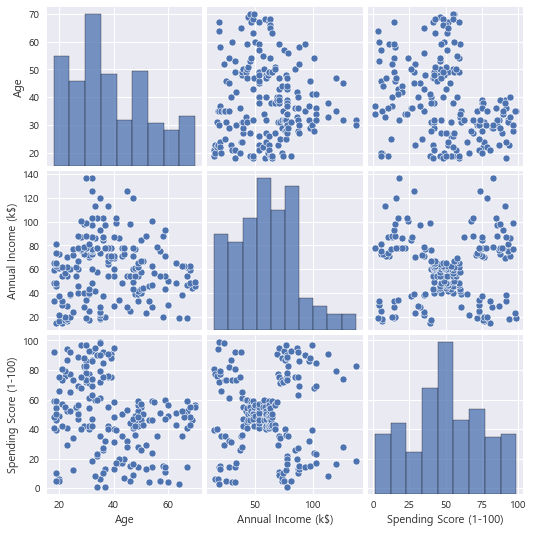

In [6]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(data[cols])

위 그래프는 주어진 ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] 칼럼에 대하여 2차원 상으로 시각화 한 결과이다.

시각적으로 군집화가 가능할 것으로 보이는 관계는

**Age와 Spending Score (1-100), Annual Income (k$)와 Spending Score (1-100)**

총 2가지 경우로 판단된다.

## Age & Spending Score (1-100)

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

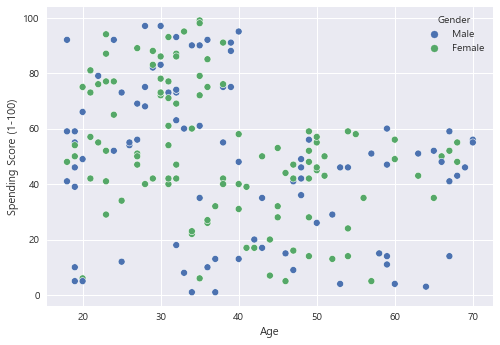

In [7]:
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Gender')

2개 ~ 4개의 군집으로 나뉘어질 것으로 판단되며 성별의 경우 군집화에 큰 영향을 주지 않는 다는 것을 확인할 수 있다.

## Annual Income (k$) & Spending Score (1-100)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

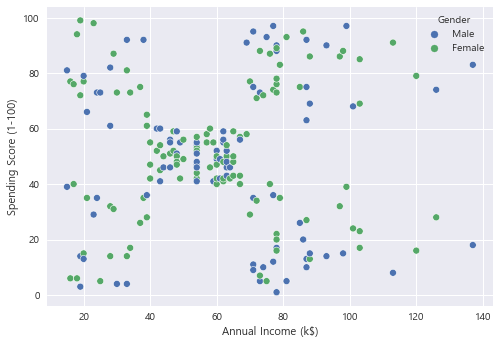

In [8]:
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

최대 5개의 군집으로 나뉘어질 것으로 판단되며 성별의 경우 군집화에 큰 영향을 주지 않는 다는 것을 확인할 수 있다.

## Age & Spending Score (1-100) & Annual Income (k$)

3차원을 2차원 상에 공간에 시각화 시키기 위하여 차원축소 알고리즘인 PCA를 사용하겠다.

PCA의 경우 변수의 스케일 다르면 분산이 달라지고 분산인 큰 쪽으로 차원을 축소하는 경향이 존재하기 때문에 정규화를 통해서 스케일을 맞춰줘야한다.

In [9]:
from sklearn.preprocessing import MinMaxScaler # 정규화 패키지

scaler = MinMaxScaler()
data['Age_MinMax'] = scaler.fit_transform(data['Age'].values.reshape(-1,1))
data['Spending Score (1-100)_MinMax'] = scaler.fit_transform(data['Spending Score (1-100)'].values.reshape(-1,1))
data['Annual Income (k$)_MinMax'] = scaler.fit_transform(data['Annual Income (k$)'].values.reshape(-1,1))

In [10]:
from sklearn.decomposition import PCA # PCA 패키지
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax', 'Annual Income (k$)_MinMax']

pca = PCA(n_components=2) # 2개의 차원으로 축소

pca_val = pca.fit_transform(data[cols])

data['PCA_x'] = pca_val[:, 0] # 첫번째 차원을 x로
data['PCA_y'] = pca_val[:, 1] # 두번째 차원을 y로

<AxesSubplot:xlabel='PCA_x', ylabel='PCA_y'>

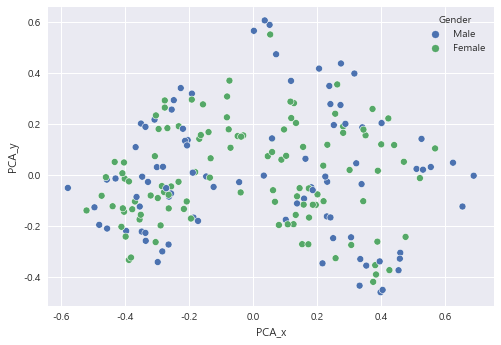

In [11]:
sns.scatterplot(data=data, x='PCA_x', y='PCA_y', hue='Gender')

2개 ~ 4개의 군집으로 나뉘어질 것으로 판단되며 성별의 경우 군집화에 큰 영향을 주지 않는다는 것을 확인할 수 있다.

# Clustering

군집화는 군집화가 가능할 것으로 판단되는

- Age & Spending Score (1-100)

- Annual Income (k$) & Spending Score (1-100)  

- Age & Spending Score (1-100) & Annual Income (k$)

총 3가지의 경우를 가지고

- Agglomerative Hierarchical Clustering 
- K-Means Clustering
- GMM
- DBSCAN

총 4개의 알고리즘을 통하여 군집화를 진행하겠다.


### Agglomerative Hierarchical Clustering
Hierarchical Clustering은 거리 또는 유사도를 기반으로 클러스터를 형성하는 알고리즘이다.

step
1. 각 데이터 포인트를 클러스터로 할당합니다. (n개의 클러스터)
2. 가까운 클러스터끼리 병합합니다.
3. 1개의 클러스터가 될 때까지 반복합니다.

주요 파라미터
- affinity : 거리 측정 방식을 결정하는 파라미터로 기본 값은 euclidean이며 manhattan, cosine 등의 거리 측정 방식을 설정할 수 있다.
- n_clusters : 군집수를 지정하는 파라미터이다.
- linkage: 군집간의 거리를 계산하능 방식을 결정하는 파라미터로 single, complete, average, ward 등의 연결법을 설정할 수 있다.

### K-Means Clustering
군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중싱에 가장 가까운 포인트들을 선택하는 군집화 기법

step
1. 자신이 선택한 개수의 군집의 중심점을 설정
2. 각 데이터는 가장 가까운 군집 중심정에 소속
3. 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동
4. 각 데이터는 이동된 중심점 기준으로 가장 가까운 중심점에 소속
5. 다시 중심점에 할당된 데이터들의 평균 중심으로 중심점 이동
6. 중심정을 이동하였지만 데이터들의 중심점 소속 변경이 없으면 군집화 완료

주요 파라미터
- n_clusters : 군집수를 지정하는 파라미터이다.

### GMM
GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(정규분포)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다.

step
- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주하며 섞인 데이터 분포에서 설정한 군집수 만큼의 가우시안 분포를 추출한다.
- 가우시안 분포를 추정할 때는 개별 정규분포의 평균과 분산, 각 데이터가 어떤 정규 분포에 해당되는지의 확률을 가지고 추정을 한다.

주요 파라미터
- n_components : 군집수를 지정하는 파라미터이다.


### DBSCAN
밀도 기반 군집화의 대표적인 알고리즘이다. DBSCAN은 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다.

주요 파라미터
- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터의 개수(min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수

하이퍼 파라미터
- eps : 입실론 주변 영역의 반경을 의미
- min_samples : 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수를 의미(min points + 1)

핵심 포인트 : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 한다.

특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성하며 이러한 방식으로 점차적으로 군집 영역을 확장해 나가는 것이 바로 DBSCAN 이다.

### 군집화 평가 방법: Silhouette analysis

각 군집 간의 거리가 얼마나 효과적으로 분리돼 있는지를 나타냄

효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미

## $ s(i) = \frac{(b(i) - a(i))}{(MAX(a(i), b(i)))} $

실루엣 계수는 -1 ~ 1 사이의 값을 가지며 1에 가까울수록 군처의 군집과 더 멀리 떨어져 있다는 것을 의미하며 0에 가까울수록 근처의 군집과 가까워진다는 것을 의미하며 -값은 아예 다른 군집에 데이터 포인트가 할당됐음을 의미한다.

#### 좋은 군집의 조건
1. 전체 실루엣 계수의 평균값이 1에 가까울수록 좋다.
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평규값에서 크게 벗어나지 않는 것이 중요하다. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집의 조건이 아니다.

따라서 Silhouette Score 자체가 만능이 아니라는 것이며 직접 눈으로 보며 전체적인 군집을 파악하여 군집화를 잘하는 것이 중요하다.

분석에 들어가기 앞서 군집화 알고리즘의 경우 거리 기반의 알고리즘이기 때문에 전체 feature간의 스케일을 동일하게 해줘야 한다, 따라서 정규화를 통하여 스케일을 통일시켜주었다.

In [12]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(model, cluster_lists, X_features): 
    
    from sklearn.cluster import KMeans
    from sklearn.mixture import GaussianMixture
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.datasets import make_blobs
    from sklearn.metrics import silhouette_samples, silhouette_score
    from sklearn.decomposition import PCA
    

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(5*n_cols, 6), nrows=1, ncols=n_cols)
    
    if X_features.shape[1] > 2 :
        # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
        pca = PCA(n_components=2)
        pca_transformed = pca.fit_transform(X_features)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        if model == 'KMeans':
            # KMeans
            clusterer = KMeans(n_clusters = n_cluster, random_state=22)
            
            if X_features.shape[1] > 2 :
                cluster_labels = clusterer.fit_predict(pca_transformed)
            else:
                cluster_labels = clusterer.fit_predict(X_features)

        elif model == 'GMM':
            # GMM
            clusterer = GaussianMixture(n_components = n_cluster, random_state=22)
            
            if X_features.shape[1] > 2 :
                cluster_labels = clusterer.fit_predict(pca_transformed)
            else:
                cluster_labels = clusterer.fit_predict(X_features)
            
        else:
            # Agglomerative Hierarchical Clustering
            clusterer =  AgglomerativeClustering(n_clusters = n_cluster, linkage='average')
            
            if X_features.shape[1] > 2 :
                cluster_labels = clusterer.fit_predict(pca_transformed)
            else:
                cluster_labels = clusterer.fit_predict(X_features)
        
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title(f'Number of Cluster({model}) : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [13]:
### visualize_silhouette 함수를 그래프 상에서 시각화 해주는 함수
def visualize_plot(model, cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.mixture import GaussianMixture
    from sklearn.cluster import AgglomerativeClustering
    
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(5*n_cols, 6), nrows=1, ncols=n_cols)
    
    if X_features.shape[1] > 2 :
        # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
        pca = PCA(n_components=2)
        pca_transformed = pca.fit_transform(X_features)
        dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    else: 
        dataframe = pd.DataFrame(X_features.values, columns=['PCA1','PCA2'])
        
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if model == 'KMeans':
            # KMeans
            clusterer = KMeans(n_clusters = n_cluster, random_state=22)
            
            if X_features.shape[1] > 2 :
                cluster_labels = clusterer.fit_predict(pca_transformed)
            else:
                cluster_labels = clusterer.fit_predict(X_features)
                
            dataframe['cluster']=cluster_labels

        elif model == 'GMM':
            # GMM
            clusterer = GaussianMixture(n_components = n_cluster, random_state=22)
            
            if X_features.shape[1] > 2 :
                cluster_labels = clusterer.fit_predict(pca_transformed)
            else:
                cluster_labels = clusterer.fit_predict(X_features)
                
            dataframe['cluster'] = cluster_labels
            
        else:
            # Agglomerative Hierarchical Clustering
            clusterer =  AgglomerativeClustering(n_clusters = n_cluster, linkage='average')
            
            if X_features.shape[1] > 2 :
                cluster_labels = clusterer.fit_predict(pca_transformed)
            else:
                cluster_labels = clusterer.fit_predict(X_features)
                
            dataframe['cluster'] = cluster_labels
        
        
        unique_labels = np.unique(cluster_labels)
        markers=['o', 's', '^', 'x', '*', 'D']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title(f'Number of Cluster({model})  : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [14]:
# DBSCAN의 eps를 구하기 위한 Elbow method를 그리는 함수
def get_eps(X_features):
    from sklearn.neighbors import NearestNeighbors
    
    nn = NearestNeighbors(n_neighbors=2)
    neighbors = nn.fit(X_features)
    distances, indices = neighbors.kneighbors(X_features)

    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.figure(figsize=(10,5))
    plt.plot(distances)
    plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
    plt.xlabel('Data Points sorted by distance',fontsize=14)
    plt.ylabel('Epsilon',fontsize=14)
    plt.show()

In [15]:
# DBSCAN의 Best parameter를 찾는 함수
def get_best_parameter_DBSCAN(X_features, eps_list, min_samples_list):
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score
    from sklearn.decomposition import PCA
    
    if X_features.shape[1] > 2 :
        # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
        pca = PCA(n_components=2)
        pca_transformed = pca.fit_transform(X_features)

    for min_samples in min_samples_list:
        for eps in eps_list:
            cluster = DBSCAN(eps = eps, min_samples = min_samples)
            if X_features.shape[1] > 2 :
                labels = cluster.fit_predict(pca_transformed)
            else: 
                labels = cluster.fit_predict(X_features)
            
            label_count = len(np.unique(labels))
            
            # 클러스터의 수가 2 ~ 7 일때 만 출력
            if 2 <= label_count <= 7:
                label_bin = np.bincount(labels+1)
                if X_features.shape[1] > 2 :
                    score = silhouette_score(pca_transformed, labels)
                else:
                    score = silhouette_score(X_features, labels)
                print('='*100)
                print(f'cluster의 개수   : {label_count}')
                print(f'각 cluster별 개수: {label_bin}')
                print(f'Silhouette Score : {score}')
                print(f'eps: {eps}, min_samples: {min_samples}')
                print('='*100)

In [16]:
# DBSCAN을 시각화 하는 함수
def visualize_DBSCAN(eps, min_samples, X_features):
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_score
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    fig, axs = plt.subplots(figsize=(5, 6), nrows=1, ncols=1)
    
    if X_features.shape[1] > 2 :
        # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
        pca = PCA(n_components=2)
        pca_transformed = pca.fit_transform(X_features)
        dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    else: 
        dataframe = pd.DataFrame(X_features.values, columns=['PCA1','PCA2'])
        
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    if X_features.shape[1] > 2 :
        cluster_labels = clusterer.fit_predict(pca_transformed)
    else:
        cluster_labels = clusterer.fit_predict(X_features)
    
    dataframe['cluster']=cluster_labels
    unique_labels = np.unique(cluster_labels)
    n_cluster = len(unique_labels)
    markers=['o', 's', '^', 'x', '*', 'D']
    
    for label in unique_labels:
        label_df = dataframe[dataframe['cluster']==label]
        if label == -1:
            cluster_legend = 'Noise'
        else :
            cluster_legend = 'Cluster '+str(label)           
        axs.scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

    axs.set_title(f'Number of Cluster(DBSCAN)  : '+ str(n_cluster))    
    axs.legend(loc='upper right')
    
    plt.show()

## Age & Spending Score (1-100)

### Agglomerative Hierarchical Clustering

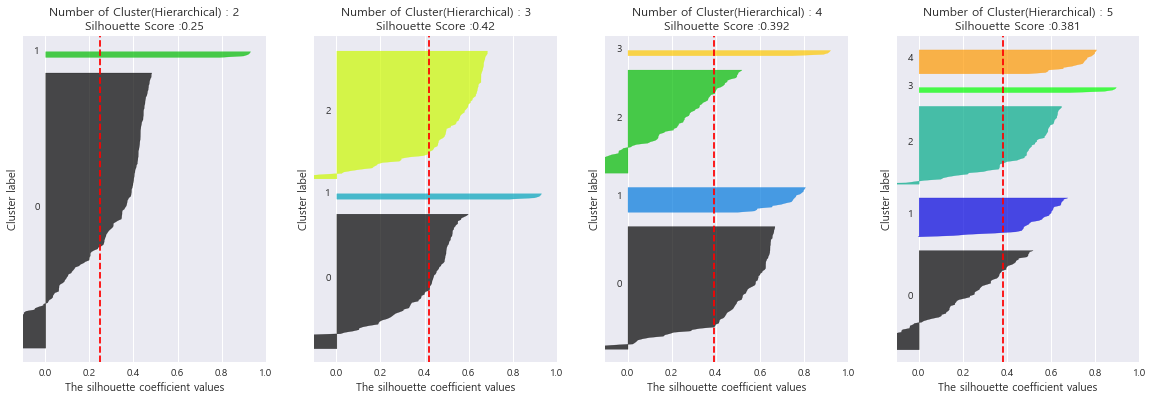

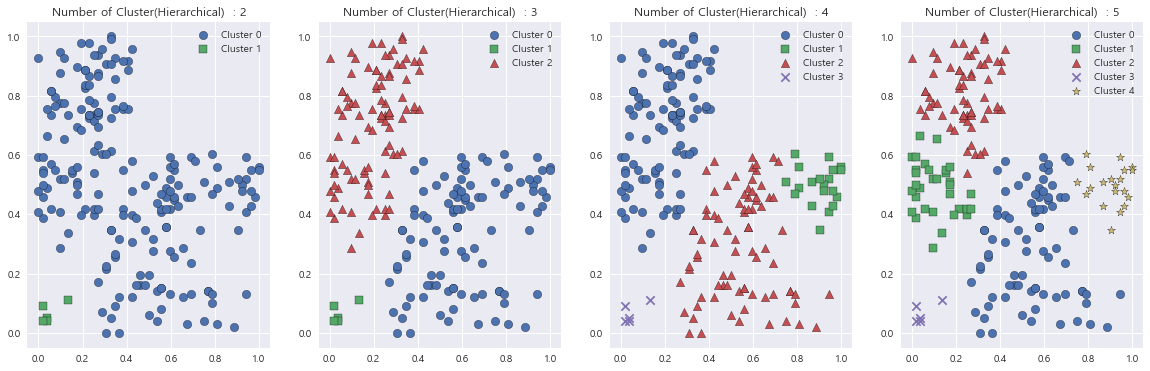

In [17]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
model = 'Hierarchical'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### K-Means Clustering

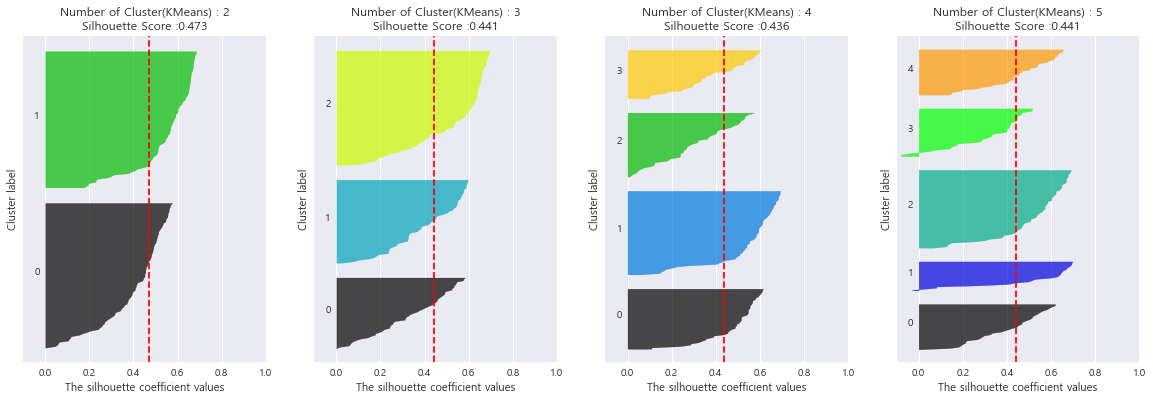

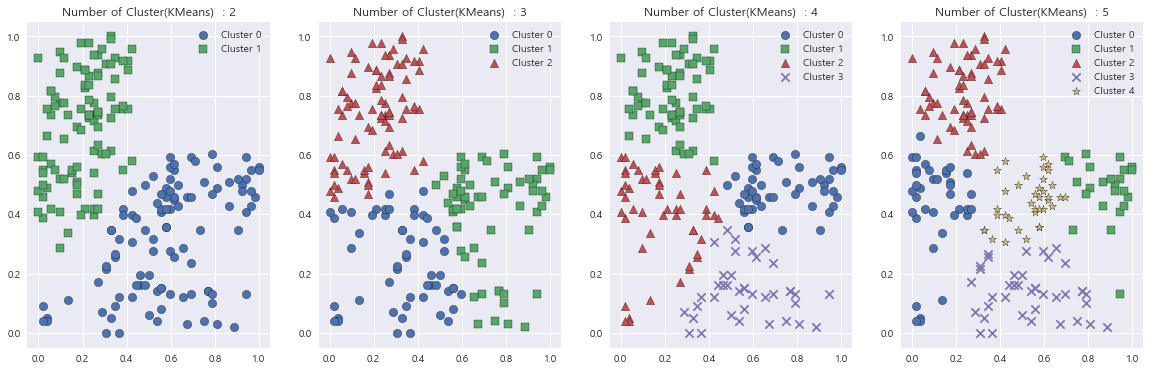

In [18]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
model = 'KMeans'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### GMM

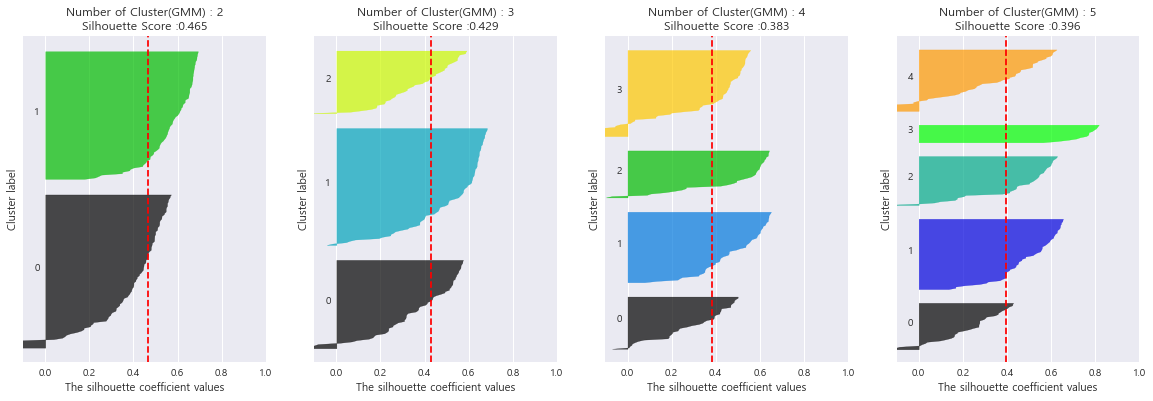

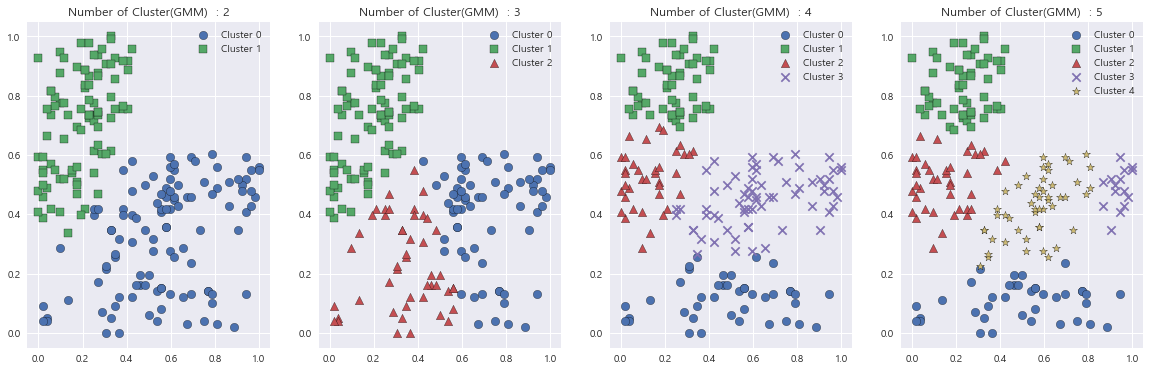

In [19]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
model = 'GMM'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### DBSCAN

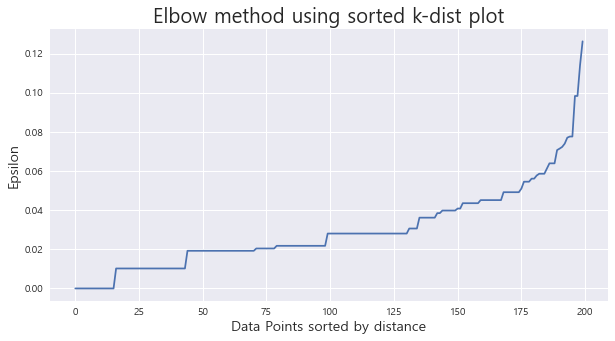

In [20]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
get_eps(X_features)

In [21]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
eps_list = [i * 0.005 for i in range(1, 15)] # 0.05 ~ 0.07까지의 eps를 넣음
min_samples_list = [3, 5, 7, 9, 11, 13, 15, 17, 19]

get_best_parameter_DBSCAN(X_features, eps_list, min_samples_list)

cluster의 개수   : 3
각 cluster별 개수: [194   3   3]
Silhouette Score : -0.15668661446663243
eps: 0.015, min_samples: 3
cluster의 개수   : 7
각 cluster별 개수: [177   7   3   4   3   3   3]
Silhouette Score : -0.4334339502509147
eps: 0.02, min_samples: 3
cluster의 개수   : 2
각 cluster별 개수: [192   8]
Silhouette Score : -0.11862800059519117
eps: 0.025, min_samples: 5
cluster의 개수   : 2
각 cluster별 개수: [191   9]
Silhouette Score : -0.11362584844650847
eps: 0.03, min_samples: 5
cluster의 개수   : 3
각 cluster별 개수: [186   9   5]
Silhouette Score : -0.09062071981497154
eps: 0.035, min_samples: 5
cluster의 개수   : 7
각 cluster별 개수: [152   8  10   5  13   5   7]
Silhouette Score : -0.27586278157904953
eps: 0.04, min_samples: 5
cluster의 개수   : 2
각 cluster별 개수: [192   8]
Silhouette Score : -0.11862800059519117
eps: 0.025, min_samples: 7
cluster의 개수   : 2
각 cluster별 개수: [191   9]
Silhouette Score : -0.11362584844650847
eps: 0.03, min_samples: 7
cluster의 개수   : 2
각 cluster별 개수: [191   9]
Silhouette Score : -0.113625848446

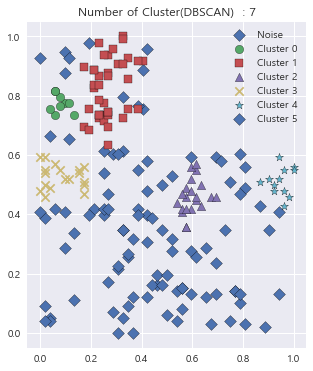

In [22]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
eps = 0.07
min_samples = 7

visualize_DBSCAN(eps, min_samples, X_features)

### Evaluation

대체적으로 DBSCAN을 제외한 알고리즘들은 군집화를 잘하고 있다고 볼 수 있다.

하지만 개인적으로 Agglomerative Hierarchical Clustering를 활용하여 군집의 수를 5개로 만드는 방법이 가장 좋을 것 같다.

왜냐하면 8시 방향의 군집을 다른 알고리즘들의 경우 제대로 군집화를 못하기 때문이다.

또한 밀도 기반 군집인 DBSCAN의 경우 이번 데이터셋에서는 좋지 못한 성능을 보이고 있다는 것을 알 수 있다.

## Annual Income (k$) & Spending Score (1-100)

### Agglomerative Hierarchical Clustering

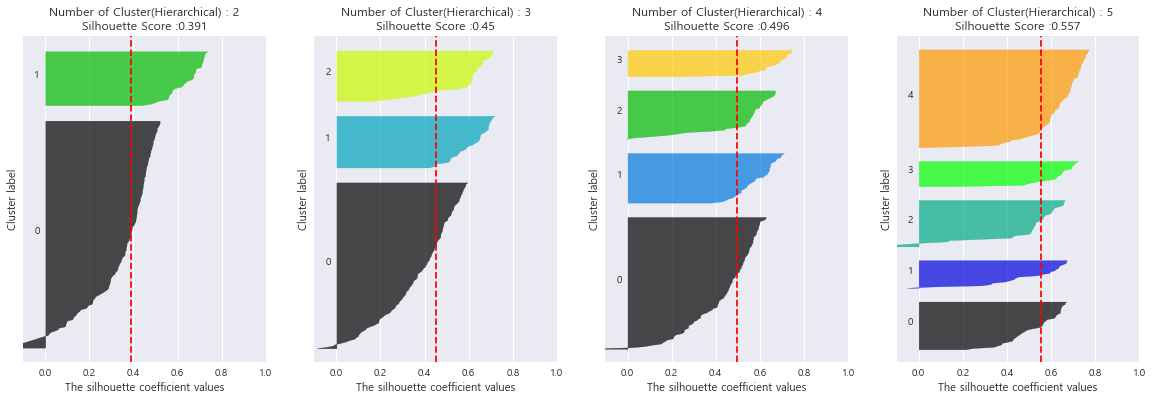

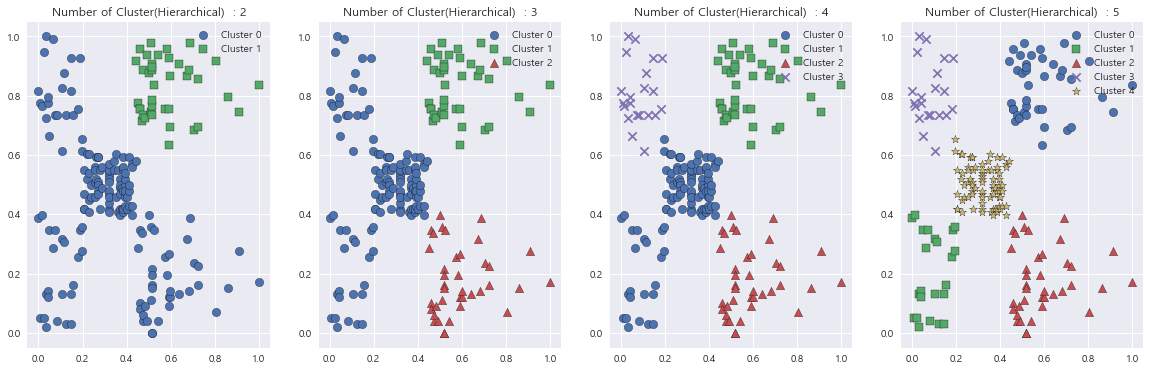

In [23]:
cols = ['Annual Income (k$)_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
model = 'Hierarchical'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### K-Means Clustering

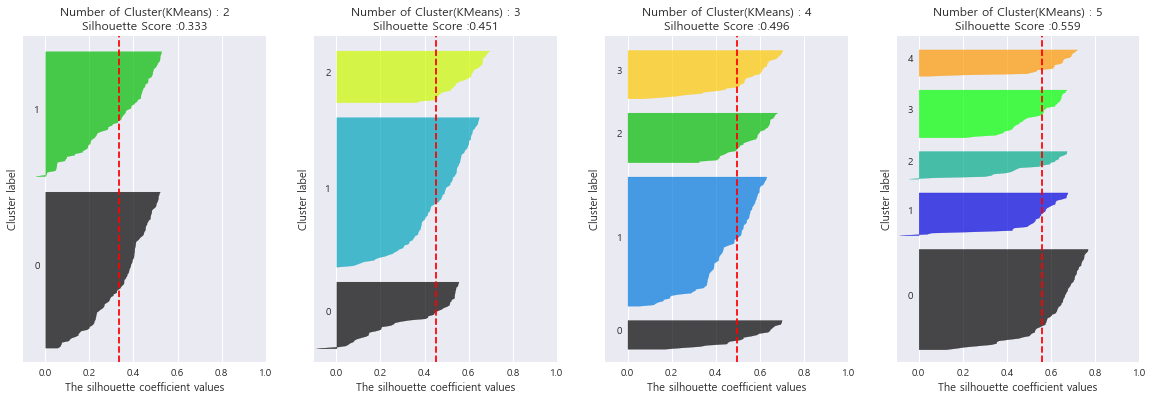

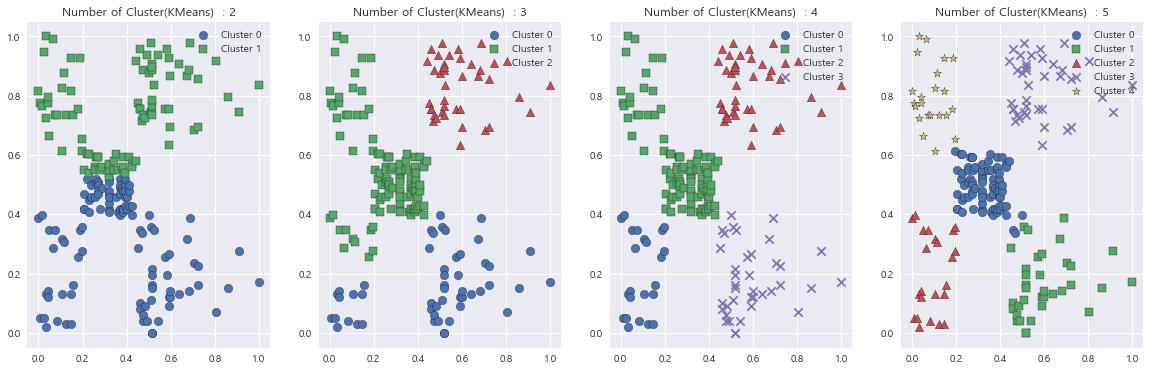

In [24]:
cols = ['Annual Income (k$)_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
model = 'KMeans'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### GMM

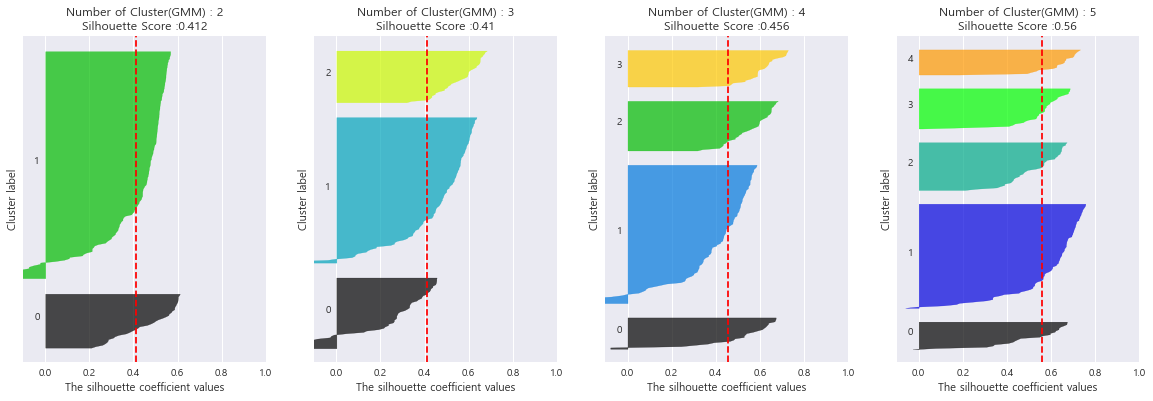

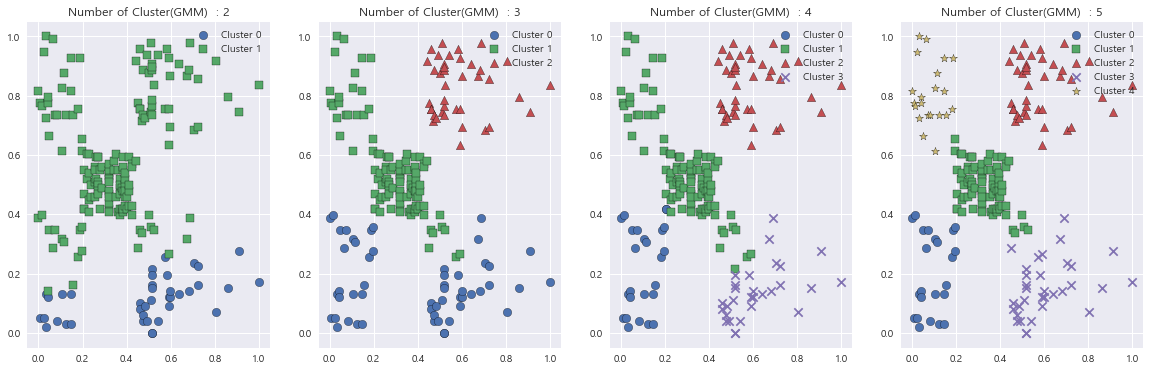

In [25]:
cols = ['Annual Income (k$)_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
model = 'GMM'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### DBSCAN

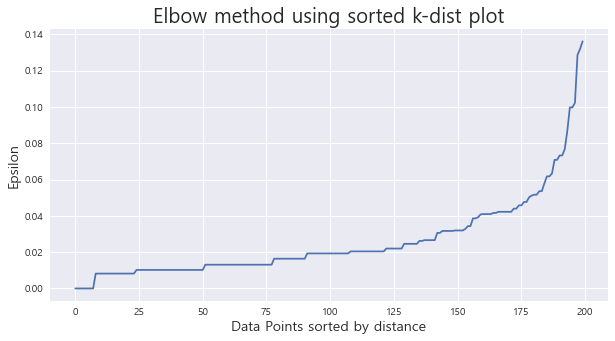

In [26]:
cols = ['Annual Income (k$)_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
get_eps(X_features)

In [27]:
cols = ['Annual Income (k$)_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
eps_list = [i * 0.005 for i in range(1, 15)] # 0.05 ~ 0.07까지의 eps를 넣음
min_samples_list = [3, 5, 7, 9, 11, 13, 15, 17, 19]

get_best_parameter_DBSCAN(X_features, eps_list, min_samples_list)

cluster의 개수   : 3
각 cluster별 개수: [194   3   3]
Silhouette Score : -0.41691759998374217
eps: 0.01, min_samples: 3
cluster의 개수   : 4
각 cluster별 개수: [179   5   9   7]
Silhouette Score : -0.3276326775913681
eps: 0.02, min_samples: 5
cluster의 개수   : 5
각 cluster별 개수: [163   7   7   9  14]
Silhouette Score : -0.2504774008664473
eps: 0.025, min_samples: 5
cluster의 개수   : 6
각 cluster별 개수: [152  11   7  10  15   5]
Silhouette Score : -0.26284904086289673
eps: 0.03, min_samples: 5
cluster의 개수   : 6
각 cluster별 개수: [108  68   4   7   8   5]
Silhouette Score : -0.1226636937154203
eps: 0.035, min_samples: 5
cluster의 개수   : 5
각 cluster별 개수: [103  74   9   7   7]
Silhouette Score : 0.046714966247200715
eps: 0.04, min_samples: 5
cluster의 개수   : 7
각 cluster별 개수: [86  6 78 10  7  8  5]
Silhouette Score : 0.10200756966214403
eps: 0.045, min_samples: 5
cluster의 개수   : 7
각 cluster별 개수: [79  6 78 10 10 12  5]
Silhouette Score : 0.14627690758859832
eps: 0.05, min_samples: 5
cluster의 개수   : 7
각 cluster별 개수: [45

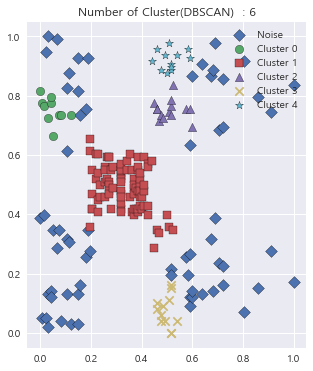

In [28]:
cols = ['Annual Income (k$)_MinMax', 'Spending Score (1-100)_MinMax']
X_features = data[cols]
eps = 0.07
min_samples = 7

visualize_DBSCAN(eps, min_samples, X_features)

밀도기반 군집의 특성을 제일 잘 보여주는 그래프라고 생각된다.

가운데에 밀집해있는 군집은 제대로 군집화했지만 밀도가 낮은 다른 노드들은 제대로 군집화를 하지 못하였다.

### Evaluation

대체적으로 DBSCAN을 제외한 알고리즘들은 군집화를 잘하고 있다고 볼 수 있다.

하지만 개인적으로 Agglomerative Hierarchical Clustering를 활용하여 군집의 수를 5개로 만드는 방법이 가장 좋을 것 같다.

왜냐하면 4시 방향의 군집에 사이드를 다른 알고리즘들의 경우 제대로 군집화를 못하였지만 Agglomerative Hierarchical Clustering의 경우 사이드의 군집도 제대로 분류하였기 때문이다.

또한 밀도 기반 군집인 DBSCAN의 경우 이번 데이터셋에서는 좋지 못한 성능을 보이고 있다는 것을 알 수 있다.

## Age & Spending Score (1-100) & Annual Income (k$)

### Agglomerative Hierarchical Clustering

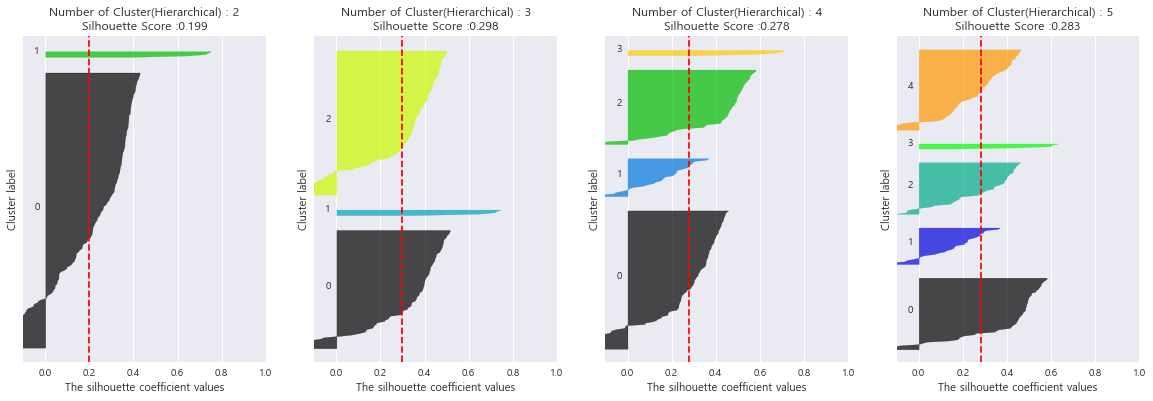

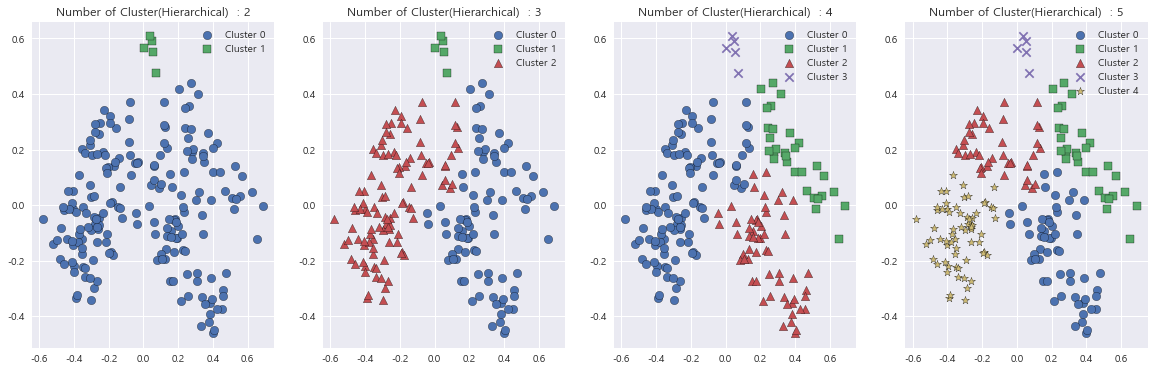

In [29]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax', 'Annual Income (k$)_MinMax']
X_features = data[cols]
model = 'Hierarchical'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### K-Means Clustering

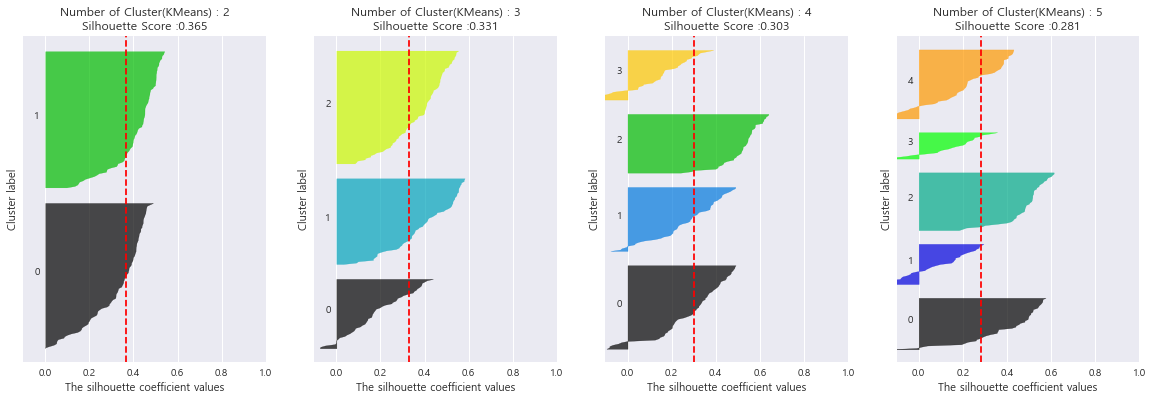

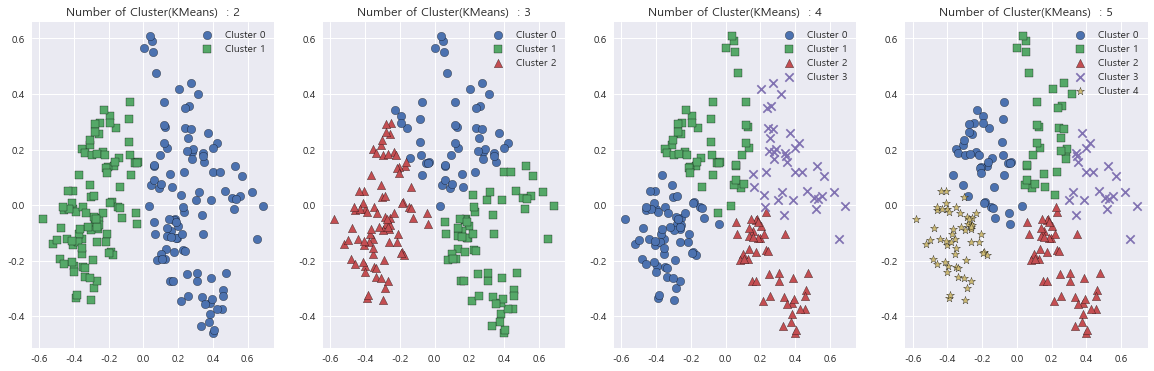

In [30]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax', 'Annual Income (k$)_MinMax']
X_features = data[cols]
model = 'KMeans'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### GMM

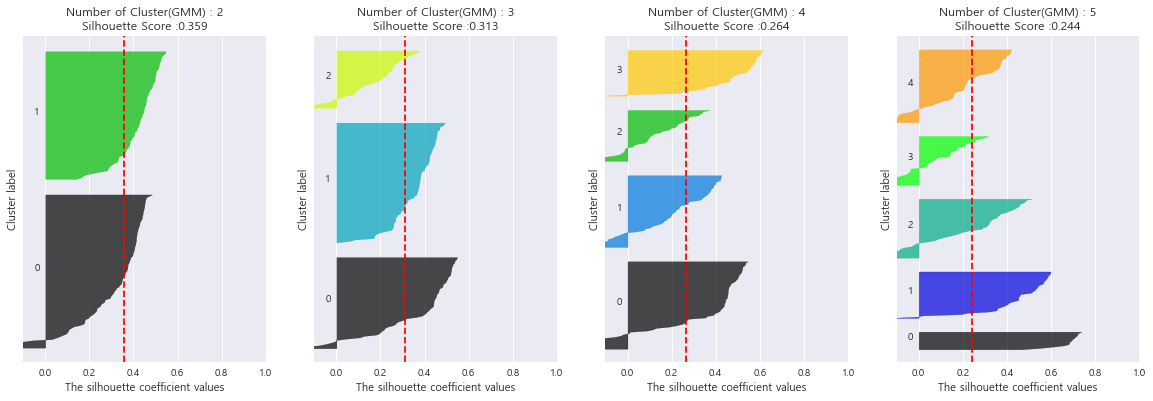

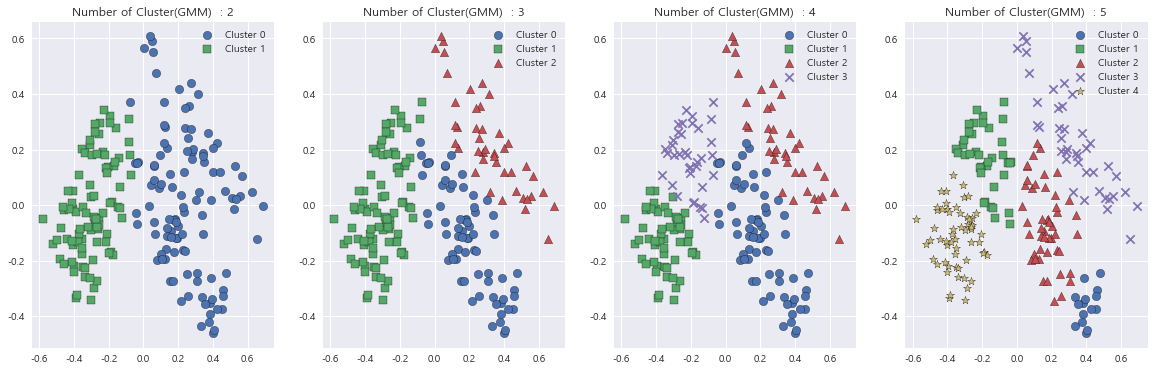

In [31]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax', 'Annual Income (k$)_MinMax']
X_features = data[cols]
model = 'GMM'
cluster_lists = [2,3,4,5]

visualize_silhouette(model, cluster_lists, X_features)
visualize_plot(model, cluster_lists, X_features)

### DBSCAN

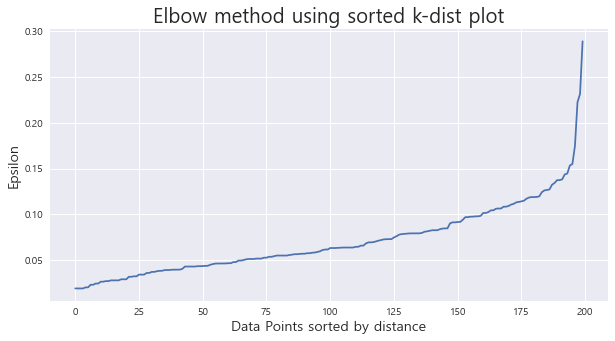

In [32]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax', 'Annual Income (k$)_MinMax']
X_features = data[cols]
get_eps(X_features)

In [33]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax', 'Annual Income (k$)_MinMax']
X_features = data[cols]
eps_list = [i * 0.05 for i in range(1, 4)] # 0.05 ~ 0.15까지의 eps를 넣음
min_samples_list = [3, 5, 7, 9, 11, 13, 15, 17, 19]

get_best_parameter_DBSCAN(X_features, eps_list, min_samples_list)

cluster의 개수   : 3
각 cluster별 개수: [  2 193   5]
Silhouette Score : 0.1712296975785767
eps: 0.1, min_samples: 3
cluster의 개수   : 3
각 cluster별 개수: [  3 192   5]
Silhouette Score : 0.16599413499173934
eps: 0.1, min_samples: 5
cluster의 개수   : 2
각 cluster별 개수: [  1 199]
Silhouette Score : 0.2443365147435607
eps: 0.15000000000000002, min_samples: 5
cluster의 개수   : 4
각 cluster별 개수: [163  13  17   7]
Silhouette Score : -0.23448430462968736
eps: 0.05, min_samples: 7
cluster의 개수   : 2
각 cluster별 개수: [ 13 187]
Silhouette Score : 0.21906469174333737
eps: 0.1, min_samples: 7
cluster의 개수   : 2
각 cluster별 개수: [  1 199]
Silhouette Score : 0.2443365147435607
eps: 0.15000000000000002, min_samples: 7
cluster의 개수   : 3
각 cluster별 개수: [176  13  11]
Silhouette Score : -0.30615647412339325
eps: 0.05, min_samples: 9
cluster의 개수   : 6
각 cluster별 개수: [33 92 14 15 28 18]
Silhouette Score : 0.29966081671143985
eps: 0.1, min_samples: 9
cluster의 개수   : 2
각 cluster별 개수: [  6 194]
Silhouette Score : 0.2679351304809929


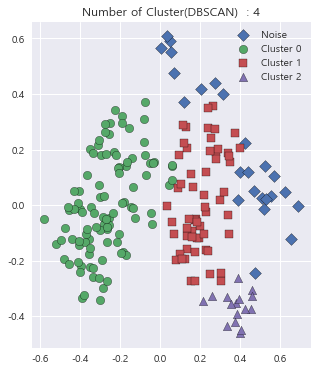

In [35]:
cols = ['Age_MinMax', 'Spending Score (1-100)_MinMax', 'Annual Income (k$)_MinMax']
X_features = data[cols]
eps = 0.15
min_samples = 19

visualize_DBSCAN(eps, min_samples, X_features)

### Evaluation

이번 군집화는 3차원을 가지고 군집화를 진행하였기 때문에 시각화를 쉽게하기 위하여 PCA의 방법을 통하여 차원을 축소하여 군집화를 진행하였다.

대체적으로 대부분의 알고리즘들이 모두 군집화를 잘하고 있다고 볼 수 있다.

하지만 개인적으로 K-Means Clustering를 활용하여 군집의 수를 4개로 만드는 방법이 가장 좋을 것 같다.

왜냐하면 전체적인 군집의 Silhouette Score 값의 평균과 분산의 편차가 작다고 할 수 있으며 일반화되게 군집화를 잘했다고 생각하기 때문이다.

# 결론

군집화 알고리즘의 경우 어느 방법이 더 우수한 것이 아닌 데이터의 특성에 따라서 적절한 군집화 기법이 있기 때문에 상황에 따라 적절한 알고리즘을 활용하는 것이 중요하다.

또한 군집화를 평가하는 방법으로 Silhouette Score가 있지만 Silhouette 자체가 만능이 아니기 때문에 직접 군집화를 눈으로 보면서 군집수를 결정해야하며 Silhouette Score 뿐만 아니라 군집의 크기, 분산 등 여러 조건을 고려해서 최적의 군집 수를 찾아야 한다. 

# 참고자료

1. 파이썬 머신러닝 완벽가이드(권철민)
2. https://www.kaggle.com/datark1/customers-clustering-k-means-dbscan-and-ap
3. https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis
4. https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/